In [1]:
import os, shutil
original_dataset_dir = r'C:\kaggle_original_dat\train'
base_dir = r'C:\cats_and_dogs_small'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [2]:
if not os.path.exists(train_cats_dir):  
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)
        
if not os.path.exists(validation_cats_dir):
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

if not os.path.exists(test_cats_dir):
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)
        
if not os.path.exists(train_dogs_dir):
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)        
        
if not os.path.exists(validation_dogs_dir):
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)
        
if not os.path.exists(test_dogs_dir):
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)        

In [3]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

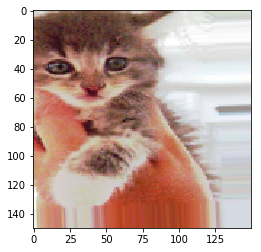

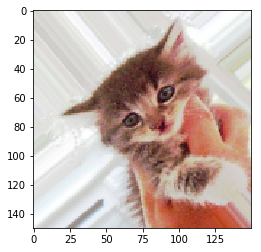

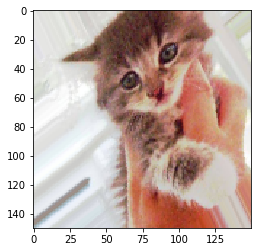

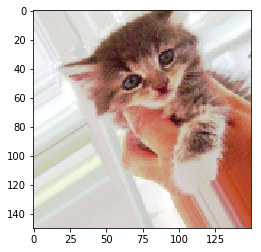

In [5]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()        

In [6]:
from keras import layers
from keras import models
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 220s 2s/step - loss: 0.6923 - acc: 0.5250 - val_loss: 0.6789 - val_acc: 0.5831
Epoch 2/100
100/100 [==============================] - 239s 2s/step - loss: 0.6811 - acc: 0.5712 - val_loss: 0.6603 - val_acc: 0.5945
Epoch 3/100
100/100 [==============================] - 584s 6s/step - loss: 0.6651 - acc: 0.5887 - val_loss: 0.6533 - val_acc: 0.6072
Epoch 4/100
100/100 [==============================] - 577s 6s/step - loss: 0.6454 - acc: 0.6231 - val_loss: 0.6281 - val_acc: 0.6428
Epoch 5/100
100/100 [==============================] - 552s 6s/step - loss: 0.6300 - acc: 0.6428 - val_loss: 0.5983 - val_acc: 0.6542
Epoch 6/100
100/100 [==============================] - 734s 7s/step - loss: 0.6112 - acc: 0.6622 - val_loss: 0.5824 - val_acc: 0.6796
Epoch 7/100
100/100 [==============================] - 550s 5s/step - loss: 0.6073 - acc: 0.6638 - val_loss: 0.5753 - val_acc: 0.6954
Epoch 8/100
100/100 [==============================] - 519s 5s

Epoch 62/100
100/100 [==============================] - 647s 6s/step - loss: 0.4103 - acc: 0.8156 - val_loss: 0.4227 - val_acc: 0.8179
Epoch 63/100
100/100 [==============================] - 693s 7s/step - loss: 0.4148 - acc: 0.8125 - val_loss: 0.4565 - val_acc: 0.8008
Epoch 64/100
100/100 [==============================] - 663s 7s/step - loss: 0.4044 - acc: 0.8147 - val_loss: 0.4401 - val_acc: 0.7963
Epoch 65/100
100/100 [==============================] - 732s 7s/step - loss: 0.4042 - acc: 0.8131 - val_loss: 0.4021 - val_acc: 0.8261
Epoch 66/100
100/100 [==============================] - 685s 7s/step - loss: 0.3996 - acc: 0.8244 - val_loss: 0.4659 - val_acc: 0.7760
Epoch 67/100
100/100 [==============================] - 665s 7s/step - loss: 0.3984 - acc: 0.8206 - val_loss: 0.4682 - val_acc: 0.7887
Epoch 68/100
100/100 [==============================] - 574s 6s/step - loss: 0.3960 - acc: 0.8241 - val_loss: 0.4825 - val_acc: 0.7900
Epoch 69/100
100/100 [==============================] -

In [12]:
model.save('cats_and_dogs_small_2.h5')

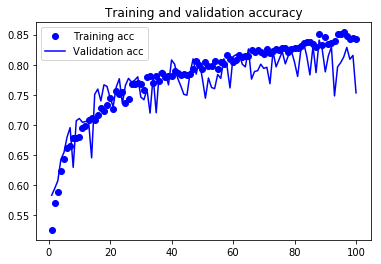

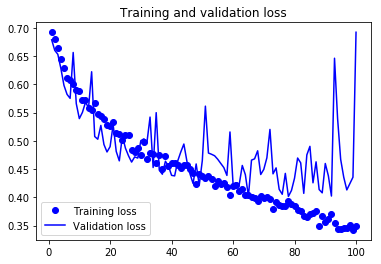

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()